In [1]:
#IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET DE LOS PAÍSES

In [3]:
#Cargamos los datos y preprocesamos para analizar los mejores países para startups
best_countries_startup = pd.read_csv("./data/best_countries_for_startups_2022.csv")

best_countries_startup = best_countries_startup.loc[:, ["country", "total score", "quantity score\r\n", "quality score\r\n"]]

best_countries_startup = best_countries_startup.reset_index(drop=True)
best_countries_startup.index +=1

best_countries_startup = best_countries_startup.rename(columns={"quantity score\r\n" : "quantity score"})
best_countries_startup = best_countries_startup.rename(columns={"quality score\r\n" : "quality score"})

#1... Top 10 paises para empezar una startup
top10_country_startup = best_countries_startup.iloc[:10,:]
top10_country_startup


,country,total score,quantity score,quality score
1,United States,195.370,27.56,164.15
2,United Kingdom,52.554,12.66,36.10
3,Israel,45.062,7.09,34.82
4,Canada,35.264,9.40,22.35
5,Sweden,28.502,4.67,20.03
6,Germany,25.334,4.96,16.84
7,Singapore,23.407,3.98,17.18
8,Australia,22.454,5.95,12.86
9,France,20.994,4.82,12.77
10,China,20.663,1.97,16.04


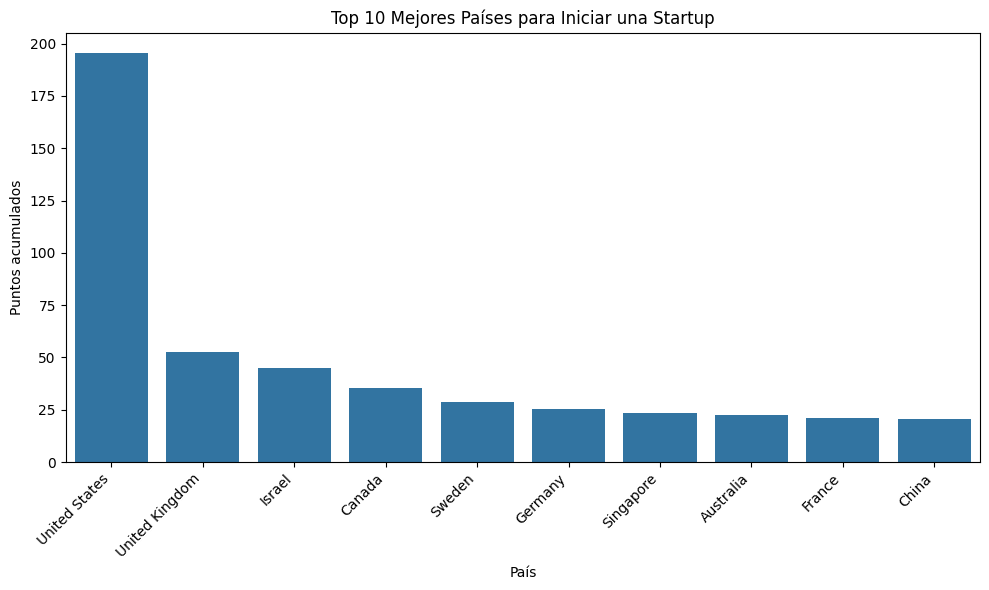

In [5]:
#Histograma de los 10 mejores países para iniciar una startup
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='total score', data=top10_country_startup)
plt.xlabel('País')
plt.ylabel('Puntos acumulados')
plt.title('Top 10 Mejores Países para Iniciar una Startup')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

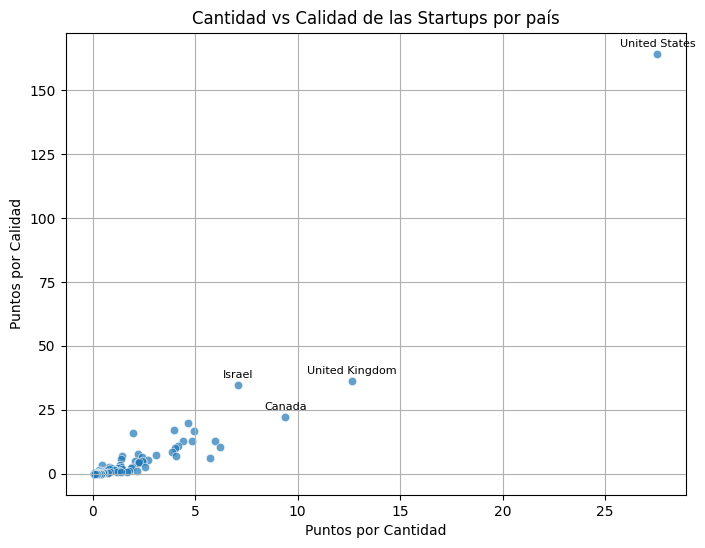

In [6]:
#Scatterplot de la cantidad vs calidad de las startups
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x='quantity score', y='quality score', data=best_countries_startup, alpha=0.7)
plt.xlabel('Puntos por Cantidad')
plt.ylabel('Puntos por Calidad')
plt.title('Cantidad vs Calidad de las Startups por país')
plt.grid(True)

best_countries_startup_top4 = best_countries_startup.iloc[:4, :]

for index, row in best_countries_startup_top4.iterrows():
    scatter_plot.text(row['quantity score'], row['quality score'] + 2, row['country'], fontsize=8,  ha='center', va='bottom')


plt.show()

In [7]:
#Cogemos un trozo del dataset para reflejar las situación de España
best_countries_startup_comp_Spain = best_countries_startup.iloc[13:18, :]
best_countries_startup_comp_Spain

,country,total score,quantity score,quality score
14,Finland,17.852,3.99,10.18
15,Ireland,15.914,3.88,8.54
16,Spain,14.481,5.71,6.07
17,Lithuania,14.194,4.07,7.00
18,Denmark,14.193,3.06,7.45


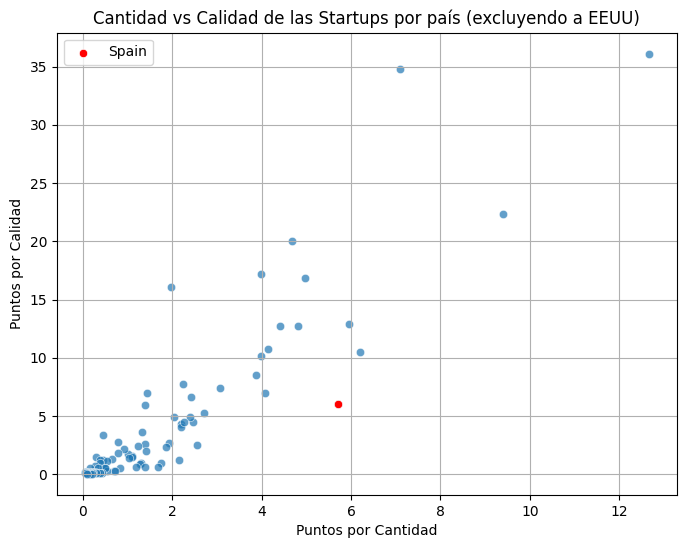

In [8]:
#Scatterplot para reflejar las situación de España
best_countries_startup_sinEEUU = best_countries_startup.iloc[1:, :]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity score', y='quality score', data=best_countries_startup_sinEEUU, alpha=0.7)

sns.scatterplot(x='quantity score', y='quality score', data=best_countries_startup_sinEEUU[best_countries_startup_sinEEUU['country'] == 'Spain'], color='red', label='Spain')

plt.xlabel('Puntos por Cantidad')
plt.ylabel('Puntos por Calidad')
plt.title('Cantidad vs Calidad de las Startups por país (excluyendo a EEUU)')
plt.grid(True)

plt.show()

---

# DATASET DE LAS CIUDADES

In [4]:
# Cargamos los datos y preprocesamos para analizar las mejores ciudades para startups
best_cities_startup = pd.read_csv("./data/best_cities_for startups_2022.csv")

best_cities_startup = best_cities_startup.loc[:, ["city", "total score", "quantity score\n", "quality score\r\n"]]

best_cities_startup = best_cities_startup.reset_index(drop=True)
best_cities_startup.index +=1

best_cities_startup = best_cities_startup.rename(columns={"quantity score\n" : "quantity score"})
best_cities_startup = best_cities_startup.rename(columns={"quality score\r\n" : "quality score"})

#3... Top 10 ciudades para empezar una startup
top10_city_startup = best_cities_startup.iloc[:5,:]
top10_city_startup

,city,total score,quantity score,quality score
1,"San Francisco Bay, United States",550.269,36.19,510.42
2,"New York, United States",217.002,18.34,195.00
3,"London, United Kingdom",125.637,21.67,100.17
4,"Los Angeles Area, United States",113.855,14.68,95.52
5,"Boston Area, United States",108.050,8.66,95.73


In [24]:
#Utilizamos geopy para conseguir las coordenadas de las ciudades que se encuentran en el dataset, columna "city"
#Después utilizamos folium para crear un mapa y situamos las coordenadas obtenidas en el mapa
from geopy.geocoders import Nominatim
import folium

geolocator = Nominatim(user_agent="startup_map")

top100_city_startup = best_cities_startup.iloc[:50,:]

top100_city_startup['Coordinates'] = top100_city_startup['city'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude) if x else None)

df_with_coords = top100_city_startup.dropna(subset=['Coordinates'])

startup_map = folium.Map(location=[51.1657, 10.4515], zoom_start=4)

for index, row in df_with_coords.iterrows():
    size = row['total score'] * 2
    folium.Marker(location=[row['Coordinates'][0], row['Coordinates'][1]], radius=size, color='blue', fill=True, fill_color='blue').add_to(startup_map)

startup_map.save("startup_map3.html")

In [22]:
#Cogemos un trozo del dataset para reflejar las situación de las ciudades de España
best_cities_startup[["City", "Country"]] = best_cities_startup.loc[:, "city"].str.split(", ", n=1, expand=True)

top5_cities_spain = best_cities_startup.loc[best_cities_startup.loc[:, "Country"]=="Spain"].head(5)

#4... Top 5 ciudades españolas para empezar una startup
top5_cities_spain = top5_cities_spain.drop(columns=["Country", "City"])
top5_cities_spain

,city,total score,quantity score,quality score
37,"Barcelona, Spain",20.669,6.18,11.49
50,"Madrid, Spain",14.378,3.58,7.49
159,"Valencia, Spain",4.911,0.82,0.78
270,"Bilbao, Spain",2.558,0.39,0.21
324,"Seville, Spain",1.724,0.26,0.14


---

# DATASET DE LAS 250 MEJORES STARTUPS 

In [5]:
#Cargamos los datos y preprocesamos para analizar las mejores startups de mundo
startups_df = pd.read_csv("./data/Startups.csv")
startups_df = startups_df.drop(columns=["Valuation_date"])

startups_ranked = startups_df.reset_index(drop=True)
startups_ranked.index +=1

startups_ranked.head(10)

,Company,Valuation,Industry,Country
1,ByteDance,140.0,Internet,China
2,SpaceX,100.0,Aerospace,United States
3,Stripe,95.0,Financial services,United States / Ireland
4,Klarna,45.6,Fintech,Sweden
5,Canva,40.0,Graphic design,Australia
6,Instacart,39.0,Retail,United States
7,Databricks,38.0,Software,United States
8,Revolut,33.0,Fintech,United Kingdom
9,Nubank,30.0,Financial services,Brazil
10,Telegram,30.0,Internet,United Kingdom / UAE


In [82]:
#Top 10 al 20 Startups según su valor
top5_startups = startups_ranked.iloc[10:20,:]
top5_startups

,Company,Valuation,Industry,Country
11,Epic Games,28.7,Video games,United States
12,Chime,25.0,Financial services,United States
13,FTX,25.0,Cryptocurrency,Bahamas
14,Byju's,21.0,Education technology,India
15,Xiaohongshu,20.0,E-commerce,China
16,Fanatics,18.0,E-commerce,United States
17,Dunamu,17.0,Cryptocurrency,South Korea
18,Trendyol,16.5,E-commerce,Turkey
19,Yuanfudao,15.5,Education technology,China
20,Checkout.com,15.0,Fintech,United Kingdom


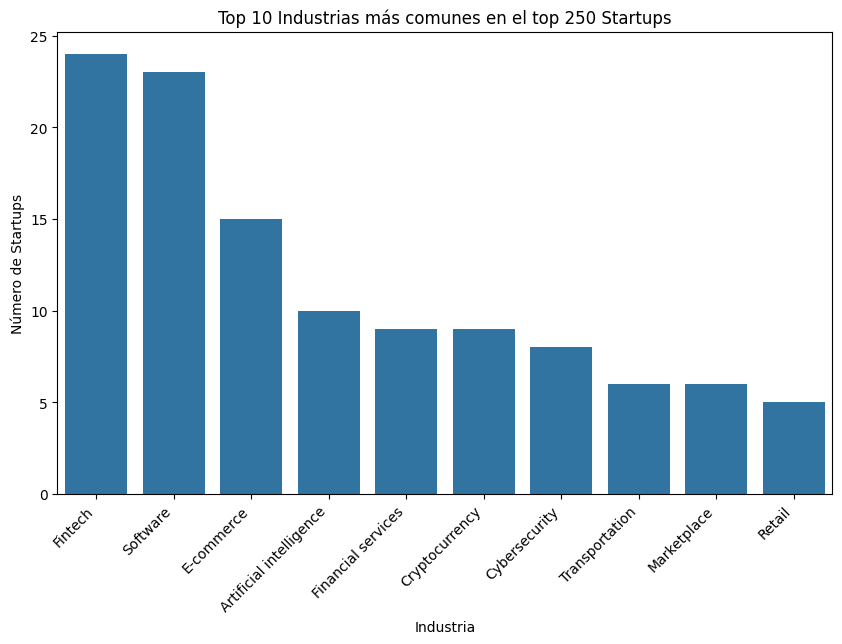

In [83]:
#Histograma del top 10 industrias más comunes
top10_industries_in_top250 = startups_ranked['Industry'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_industries_in_top250.index, y=top10_industries_in_top250.values)
plt.xlabel('Industria')
plt.ylabel('Número de Startups')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Industrias más comunes en el top 250 Startups')
plt.show()

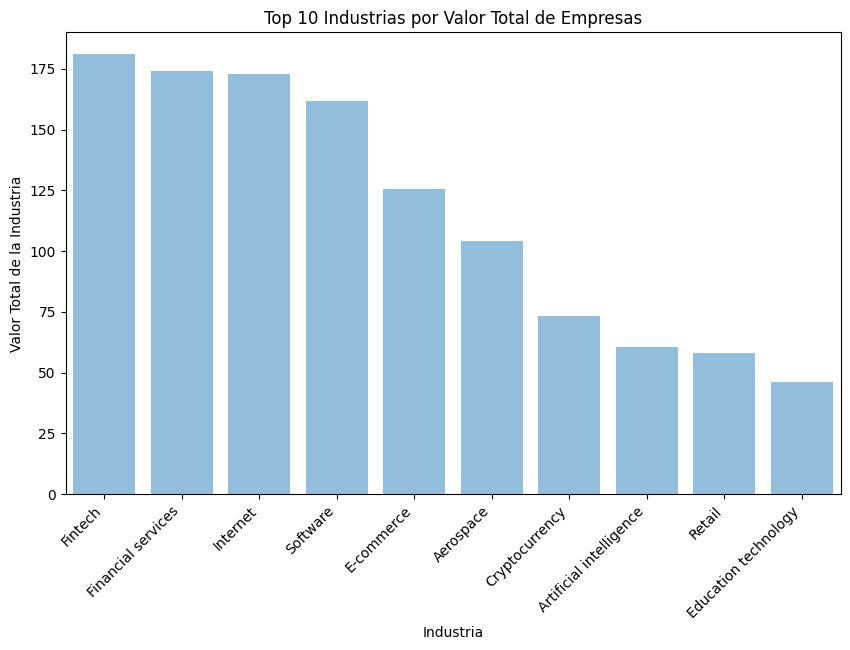

In [84]:
#Histograma del top 10 industrias con más valor

industry_valuation = startups_ranked.groupby('Industry')['Valuation'].sum()

top10_industries = industry_valuation.sort_values(ascending=False).head(10)

color_azul_claro = '#85C1E9'

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_industries.index, y=top10_industries.values, color=color_azul_claro)
plt.xlabel('Industria')
plt.ylabel('Valor Total de la Industria')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Industrias por Valor Total de Empresas')
plt.show()

In [88]:
# print(startups_ranked['Country'].unique())


['\xa0China' '\xa0United States' '\xa0United States\xa0/\xa0\xa0Ireland'
 '\xa0Sweden' '\xa0Australia' '\xa0United Kingdom' '\xa0Brazil'
 '\xa0United Kingdom\xa0/\xa0\xa0UAE' '\xa0Bahamas' '\xa0India'
 '\xa0South Korea' '\xa0Turkey' '\xa0China\xa0/\xa0\xa0Hong Kong'
 '\xa0Germany' '\xa0Hong Kong\xa0/\xa0\xa0China'
 '\xa0Portugal\xa0/\xa0\xa0United States' '\xa0Mexico' '\xa0Indonesia'
 '\xa0Canada' '\xa0Netherlands' '\xa0Israel'
 '\xa0India\xa0/\xa0\xa0United States'
 '\xa0Australia\xa0/\xa0\xa0Hong Kong'
 '\xa0China\xa0/\xa0\xa0United States' '\xa0Colombia'
 '\xa0United Kingdom\xa0/\xa0\xa0United States' '\xa0Belgium'
 '\xa0Estonia' '\xa0France\xa0/\xa0\xa0United States' '\xa0Lithuania'
 '\xa0France' '\xa0Austria' '\xa0Israel\xa0/\xa0\xa0United States'
 '\xa0Japan' '\xa0Argentina' '\xa0\xa0United States' '\xa0\xa0Vietnam'
 '\xa0\xa0China' '\xa0\xa0United Kingdom' '\xa0\xa0India'
 '\xa0\xa0Germany' '\xa0\xa0Indonesia' '\xa0\xa0France'
 '\xa0\xa0India\xa0/\xa0\xa0\xa0United States' '\xa0

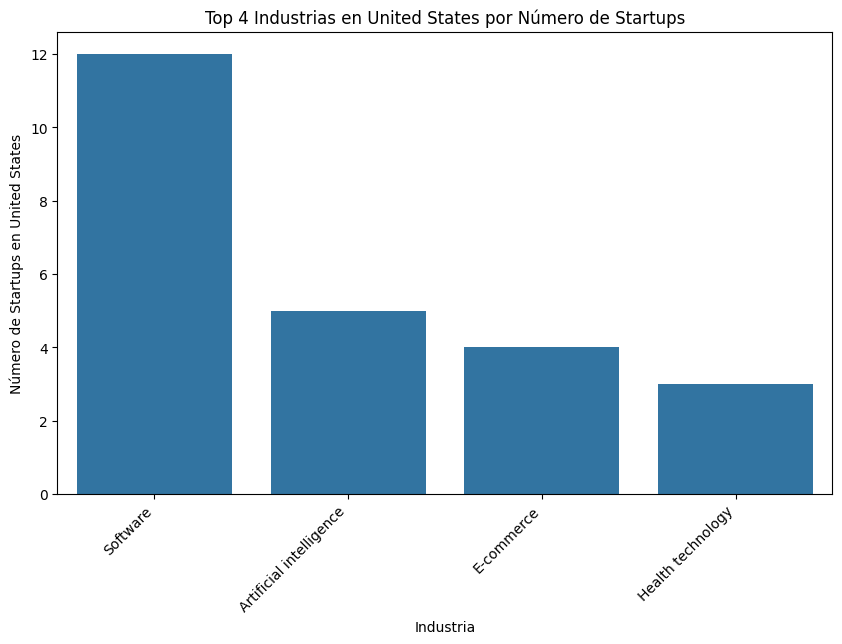

In [96]:
#Histograma del top 4 industrias más comunes en EEUU
us_startups = startups_ranked.loc[startups_ranked.loc[:, 'Country'] == '\xa0United States']

us_industry_counts = us_startups['Industry'].value_counts()

top5_us_industries = us_industry_counts.head(4)

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_us_industries.index, y=top5_us_industries.values)
plt.xlabel('Industria')
plt.ylabel('Número de Startups en United States')
plt.xticks(rotation=45, ha='right')
plt.title('Top 4 Industrias en United States por Número de Startups')
plt.show()

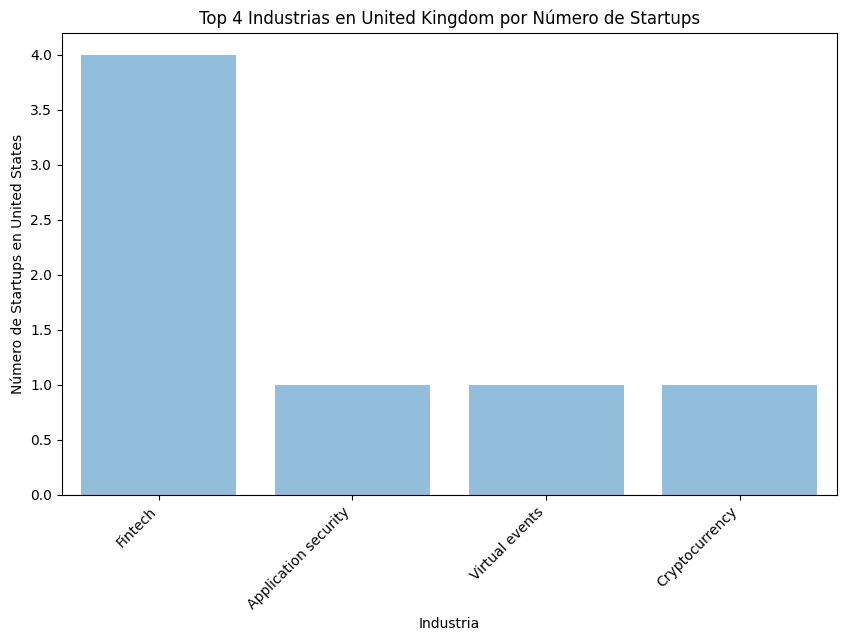

In [98]:
#Histograma del top 4 industrias más comunes en Reino Unido
uk_startups = startups_ranked.loc[startups_ranked.loc[:, 'Country'] == '\xa0United Kingdom']

uk_industry_counts = uk_startups['Industry'].value_counts()

top5_uk_industries = uk_industry_counts.head(4)

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_uk_industries.index, y=top5_uk_industries.values, color=color_azul_claro)
plt.xlabel('Industria')
plt.ylabel('Número de Startups en United States')
plt.xticks(rotation=45, ha='right')
plt.title('Top 4 Industrias en United Kingdom por Número de Startups')
plt.show()